# <center>Centro Universitário Facens<br/></center>
<font size="4"><center><b>Disciplina: Reconhecimento de Padrões</b></center></font>
  
<font size="3"><center>Prof. Fabrício Torquato</center></font>

# <center>Avaliação Continuada 2 (AC2)</center>
## <center>Dataset escolhido: Alzheimer's Disease Dataset</center>

----
#### <center>RA, Turma e nome dos componentes do grupo</center>

    
| RA       | Turma        |           Nome            |
|:-        |:-            |:-------------------------:|
|  XXXXXX  |  CP803TIN2   | João Pedro Santos Batista |
|  XXXXXX  |  CP803TIN2   | Vinicius Ribeiro Silva    |
    

*   Link para download do dataset (GitHub): https://github.com/jpsbat/datasets_ac2
* Link do Kaggle: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [ ]:
# Import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### <center>Escolha do dataset</center>
Dataset Alzheimer's Disease Dataset (classificação): Classe alvo: Diagnosis, o problema seria classificar se o paciente tem um diagnóstico de Alzheimer ou não.

---

# Análise exploratória de dados:

In [ ]:
alzheimer = pd.read_csv('alzheimers_disease_data.csv')

# alzheimer = pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')

In [ ]:
print(alzheimer.shape)

(2149, 35)


In [ ]:
print(alzheimer.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


# Dicionário das colunas

* **ADL**: Capacidade de realizar atividades do cotidiano
* **Age**: Idade
* **AlcoholConsumption**: Se o paciente consome álcool e a quantidade
* **BehavioralProblems**: Se o paciente apresenta alterações comportamentais
* **BMI**: IMC - Índice de Massa Corporal
* **CardiovascularDisease**: Se o paciente tem doenças do coração
* **CholesterolHDL**: Nível de colesterol "bom" (HDL) no sangue
* **CholesterolLDL**: Nível de colesterol "ruim" (LDL) no sangue
* **CholesterolTotal**: Nível total de colesterol no sangue
* **CholesterolTriglycerides**: Nível de triglicerídeos no sangue
* **Confusion**: Se o paciente apresenta confusão mental
* **Depression**: Se o paciente tem histórico de depressão
* **Diabetes**: Se o paciente tem diabetes
* **Diagnosis**: Diagnóstico clínico do paciente
* **DiastolicBP**: O valor da pressão arterial diastólica (valor mais baixo)
* **DietQuality**: Qualidade da dieta
* **Disorientation**: Se o paciente tem problemas de orientação (tempo, espaço, pessoas)
* **DifficultyCompletingTasks**: Se o paciente tem dificuldade em realizar tarefas simples
* **DoctorInCharge**: Médico responsável
* **EducationLevel**: Grau de escolaridade do paciente
* **Ethnicity**: Etnia
* **FamilyHistoryAlzheimers**: Histórico familiar de Alzheimer
* **Forgetfulness**: Nível de esquecimento do paciente
* **FunctionalAssessment**: Avaliação funcional da capacidade do paciente de realizar atividades diárias
* **Gender**: Gênero (Masculino/Feminino)
* **HeadInjury**: Se o paciente teve histórico de traumas na cabeça
* **Hypertension**: Se o paciente tem pressão arterial alta
* **MemoryComplaints**: Se o paciente relata problemas de memória
* **MMSE**: Uma pontuação usada para avaliar a função cognitiva do paciente
* **PatientID**: ID do paciente
* **PersonalityChanges**: Se o paciente apresenta mudanças de personalidade
* **PhysicalActivity**: Atividade física
* **SleepQuality**: Qualidade do sono
* **Smoking**: Se o paciente é fumante (Sim/Não)
* **SystolicBP**: O valor da pressão arterial sistólica (valor mais alto)



In [ ]:
alzheimer.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [ ]:
alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
alzheimer.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [ ]:
# Verificando se existem dados duplicados
sum(alzheimer.duplicated())

0

In [ ]:
# Removendo colunas desnecessárias
alzheimer.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

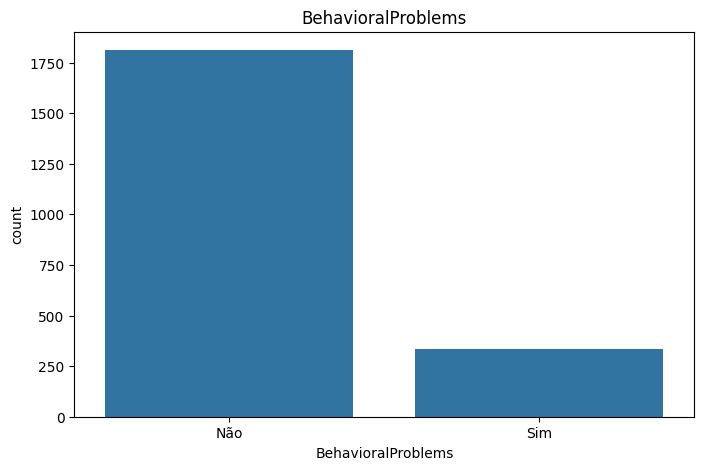

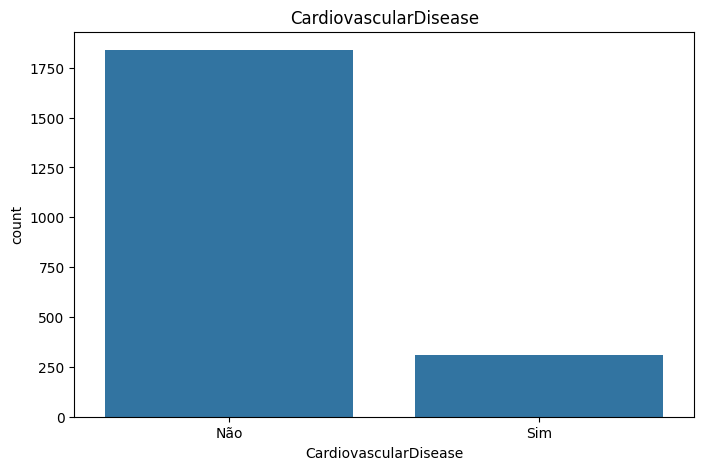

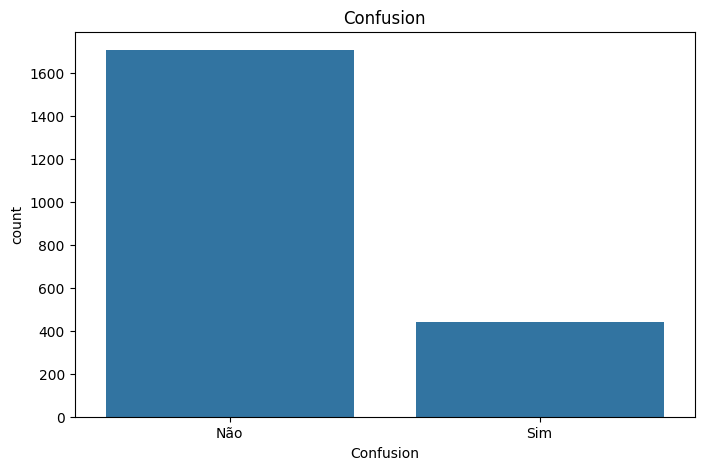

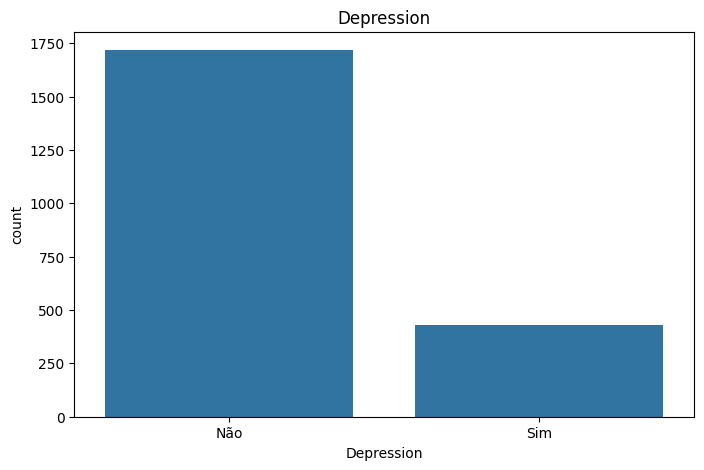

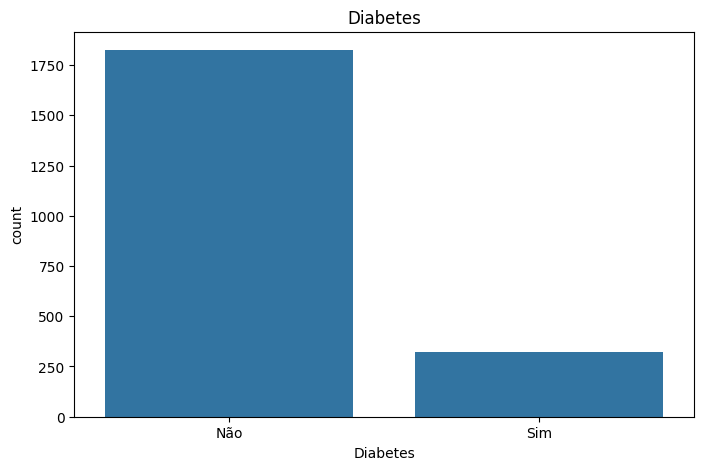

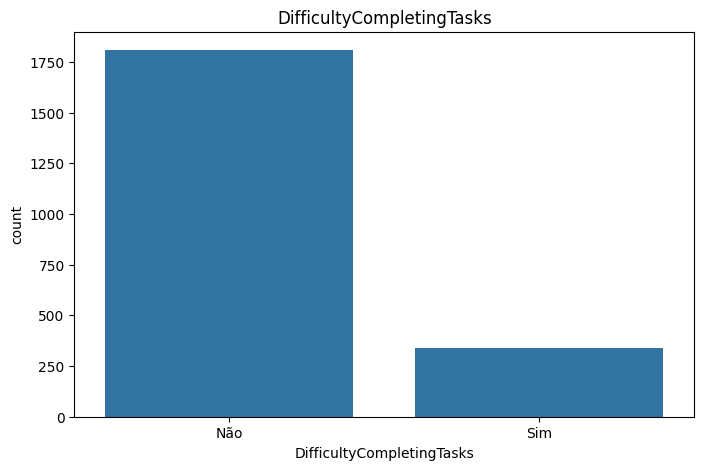

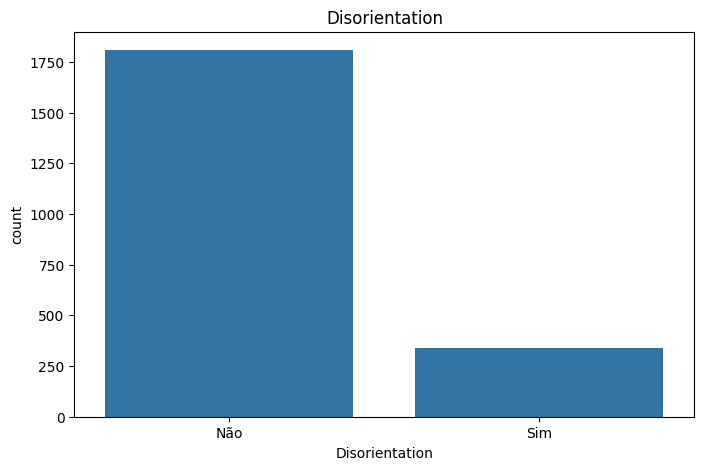

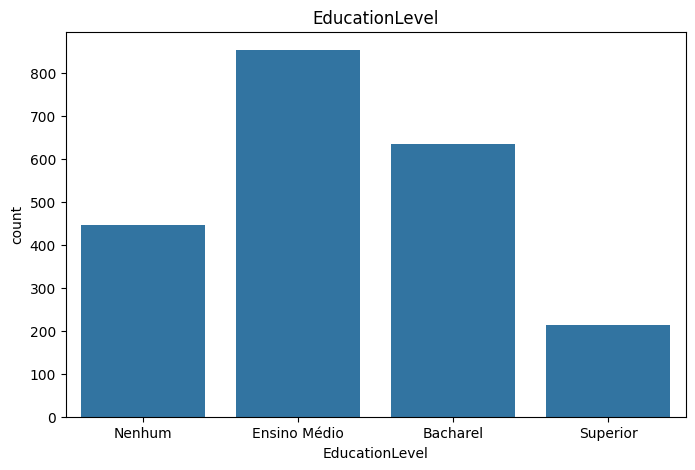

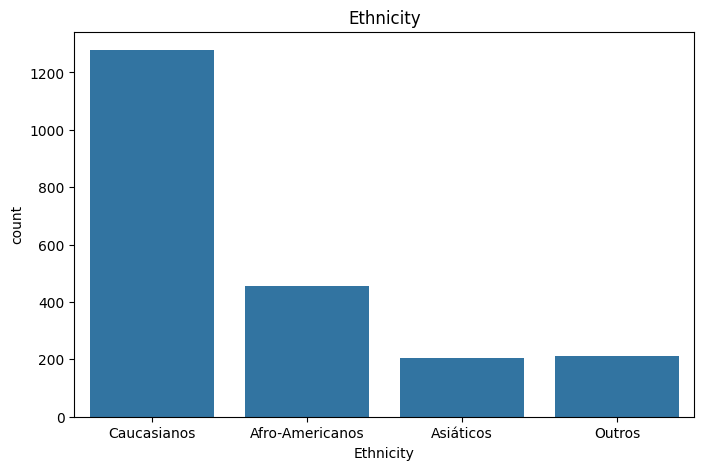

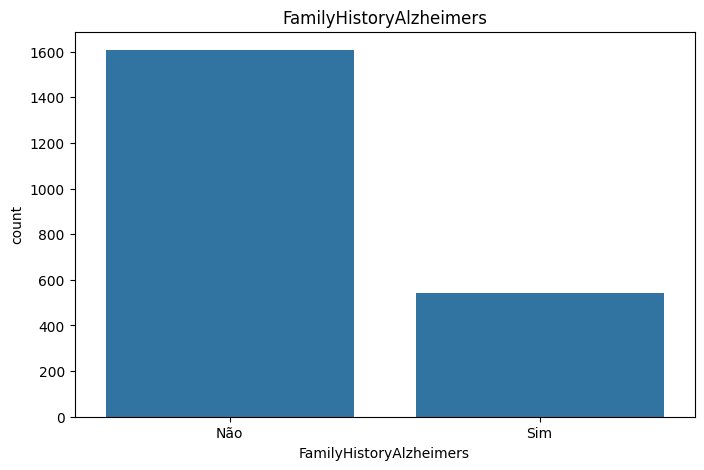

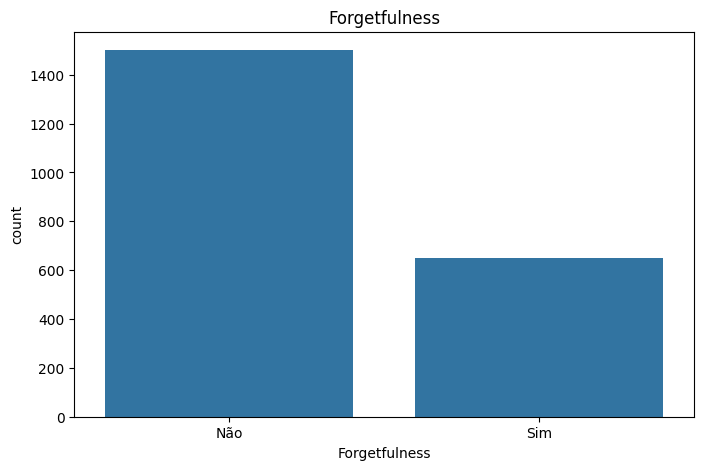

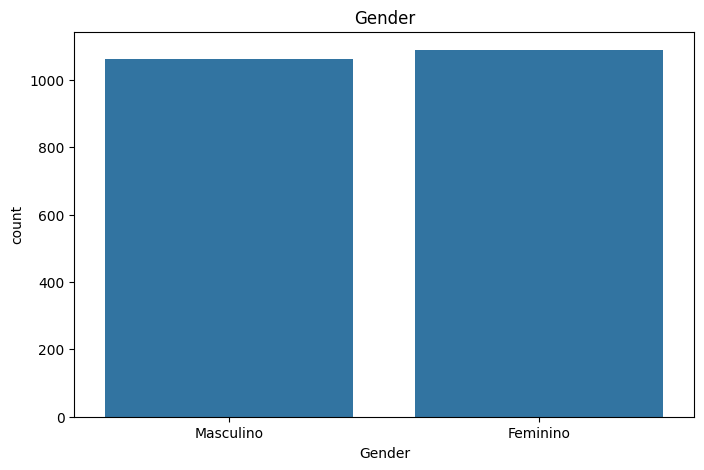

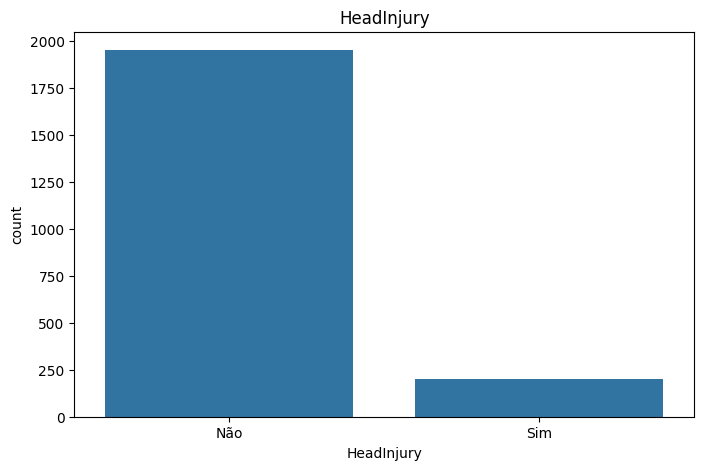

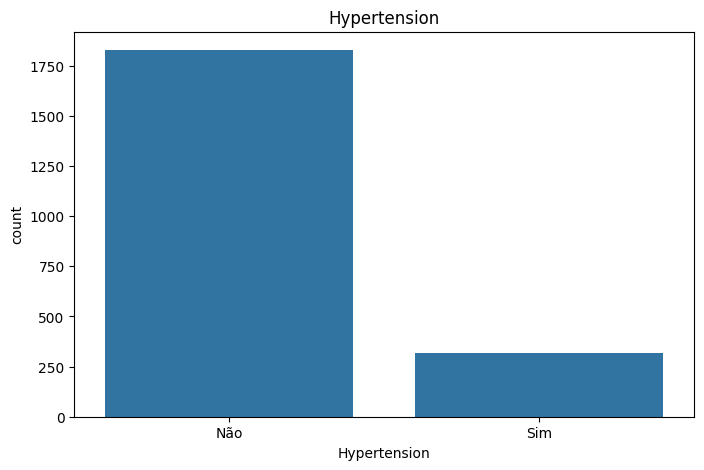

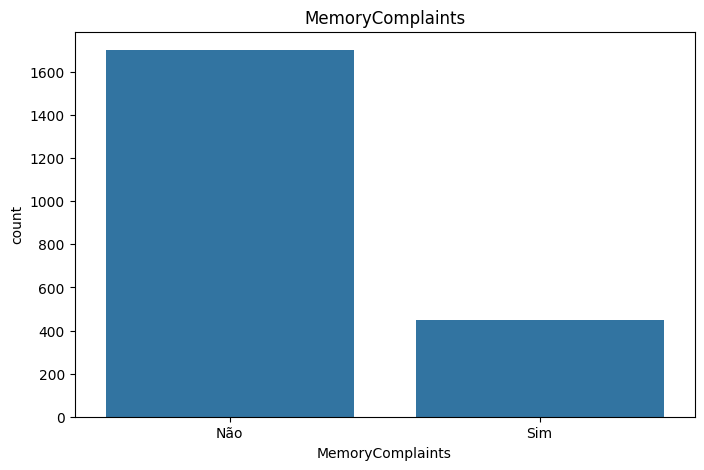

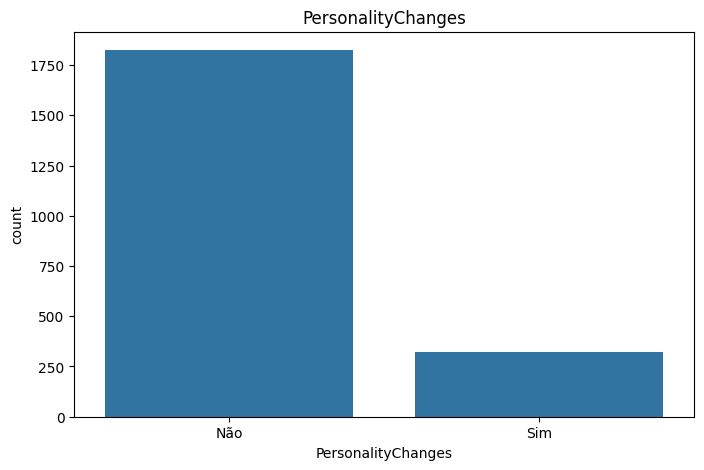

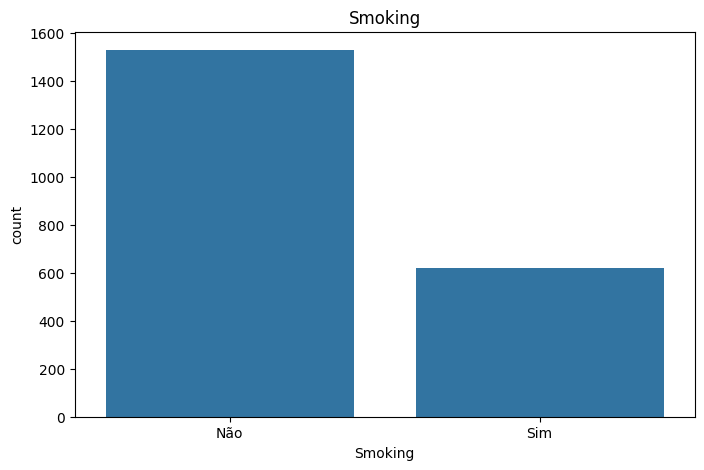

In [ ]:
# Identificar colunas numéricas: colunas com mais de 10 valores únicos são numéricas
colunas_numericas = [col for col in alzheimer.columns if alzheimer[col].nunique() > 10]

# Identificar colunas categóricas (não são numéricas)
colunas_categoricas = alzheimer.columns.difference(colunas_numericas).difference(['Diagnosis']).to_list()

# Nomes customizados
custom_labels = {
    'Gender': ['Masculino', 'Feminino'],
    'Ethnicity': ['Caucasianos', 'Afro-Americanos', 'Asiáticos', 'Outros'],
    'EducationLevel': ['Nenhum', 'Ensino Médio', 'Bacharel', 'Superior'],
    'Smoking': ['Não', 'Sim'],
    'FamilyHistoryAlzheimers': ['Não', 'Sim'],
    'CardiovascularDisease': ['Não', 'Sim'],
    'Diabetes': ['Não', 'Sim'],
    'Depression': ['Não', 'Sim'],
    'HeadInjury': ['Não', 'Sim'],
    'Hypertension': ['Não', 'Sim'],
    'MemoryComplaints': ['Não', 'Sim'],
    'BehavioralProblems': ['Não', 'Sim'],
    'Confusion': ['Não', 'Sim'],
    'Disorientation': ['Não', 'Sim'],
    'PersonalityChanges': ['Não', 'Sim'],
    'DifficultyCompletingTasks': ['Não', 'Sim'],
    'Forgetfulness': ['Não', 'Sim']
}

# Plot countplots for each categorical column
for column in colunas_categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=alzheimer, x=column)
    plt.title(f'{column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

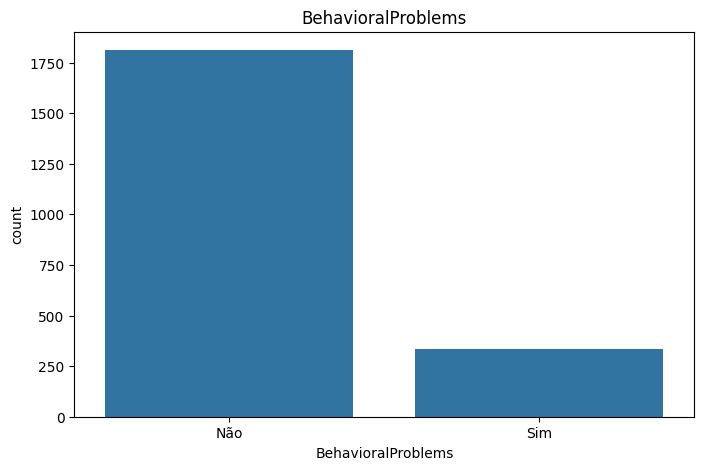

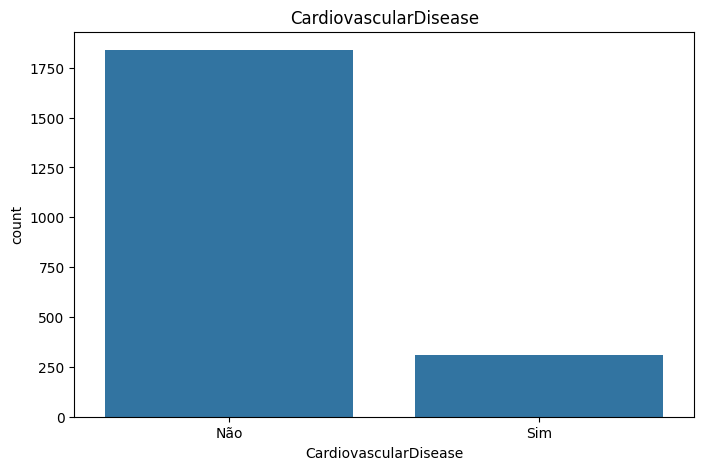

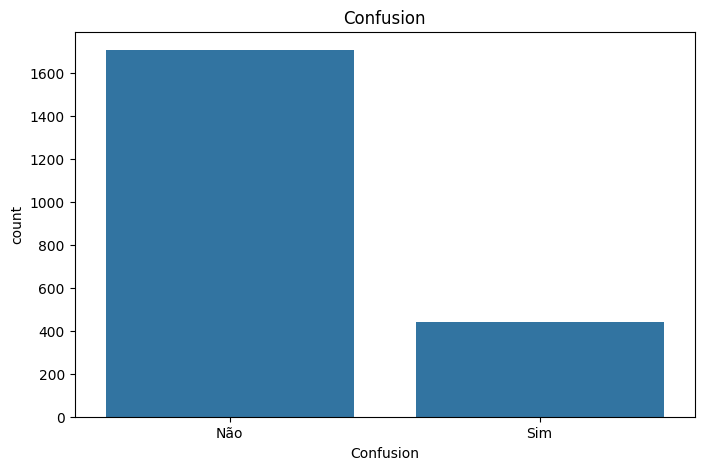

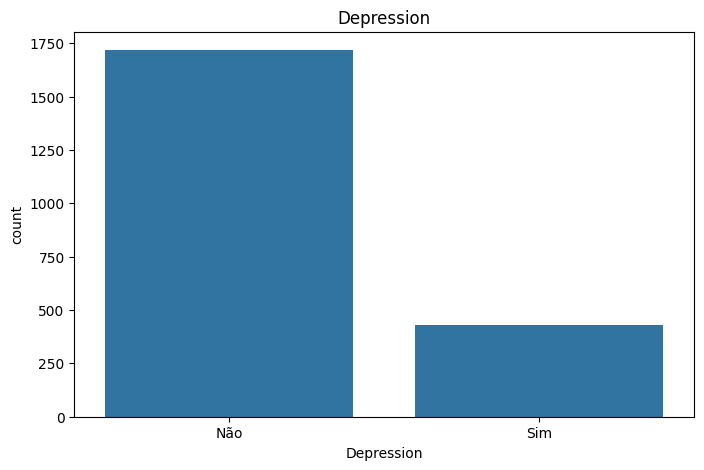

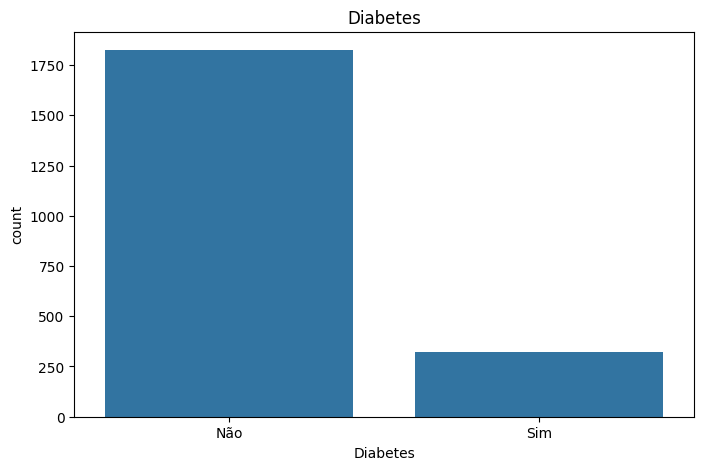

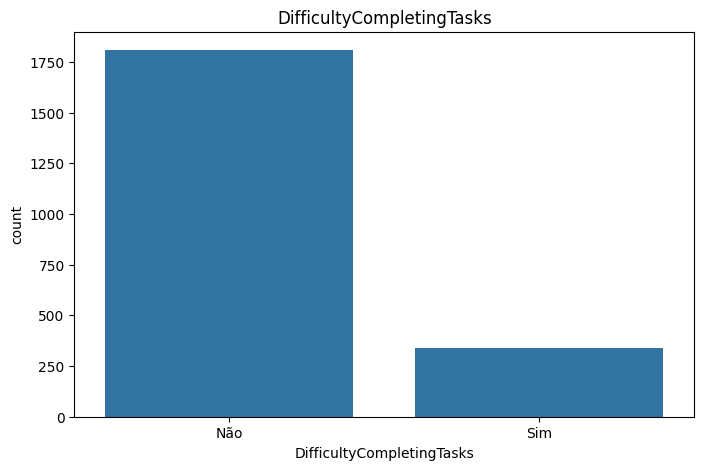

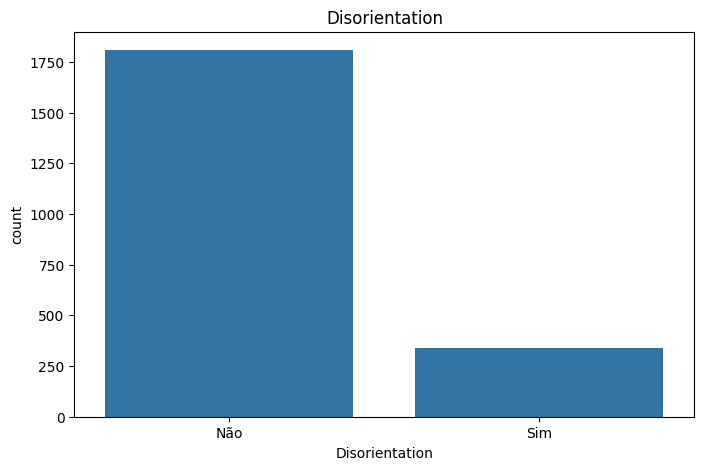

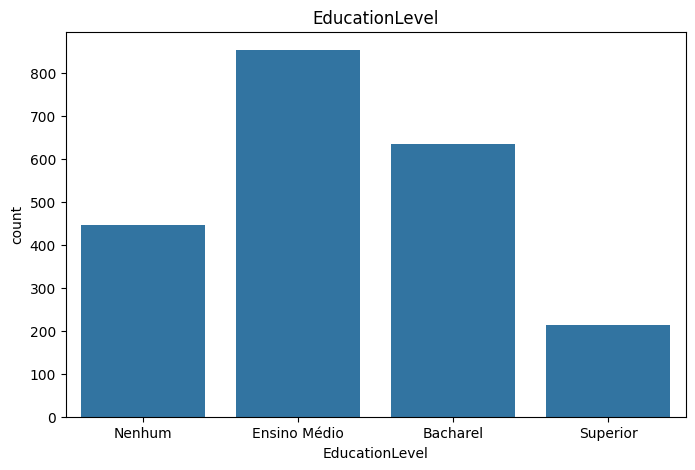

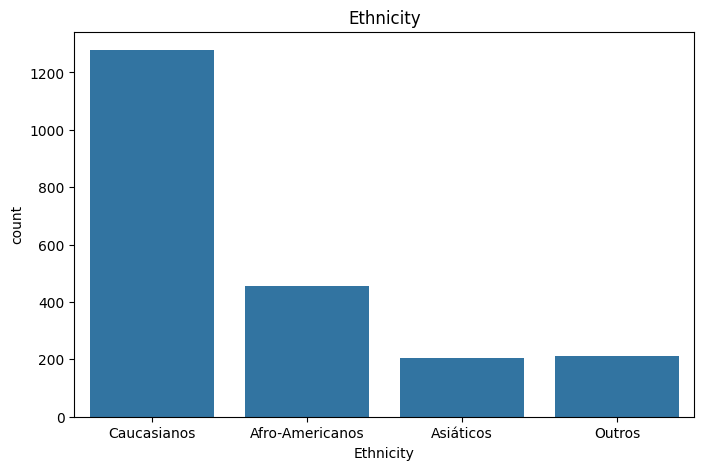

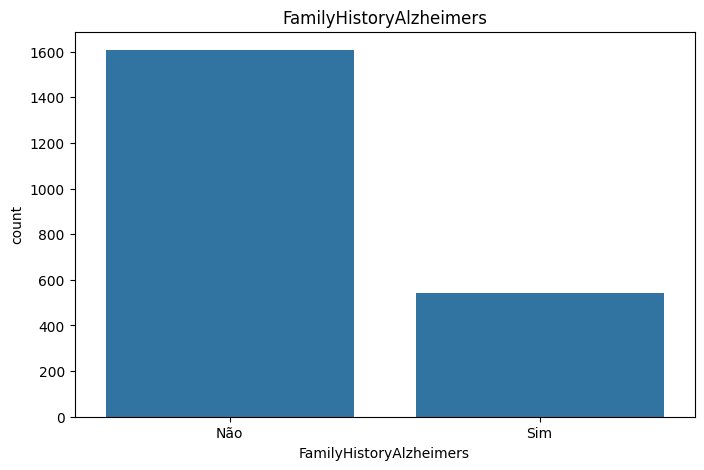

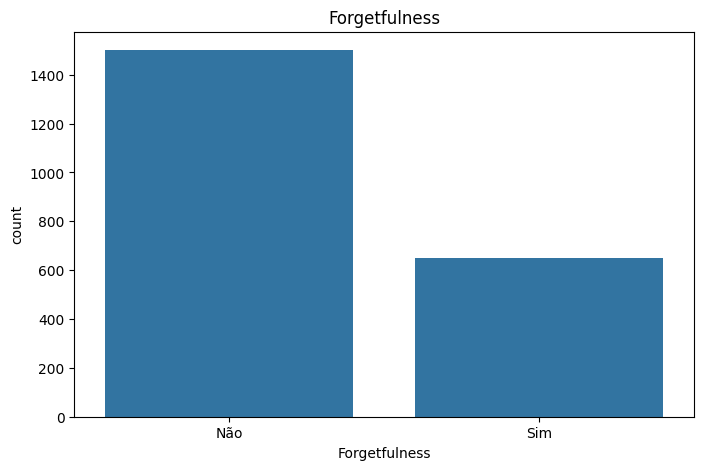

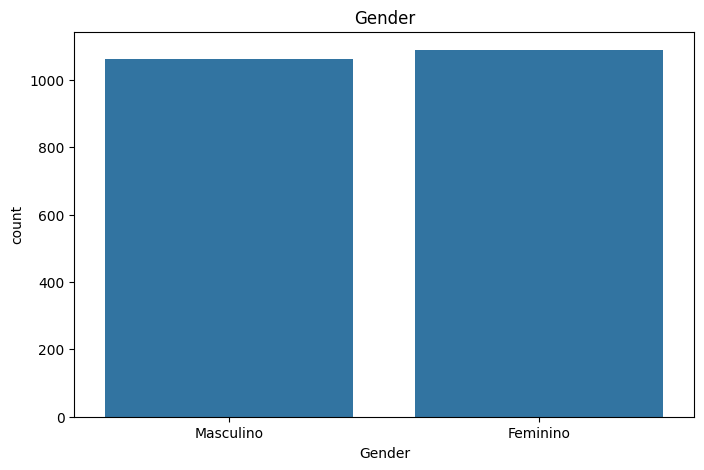

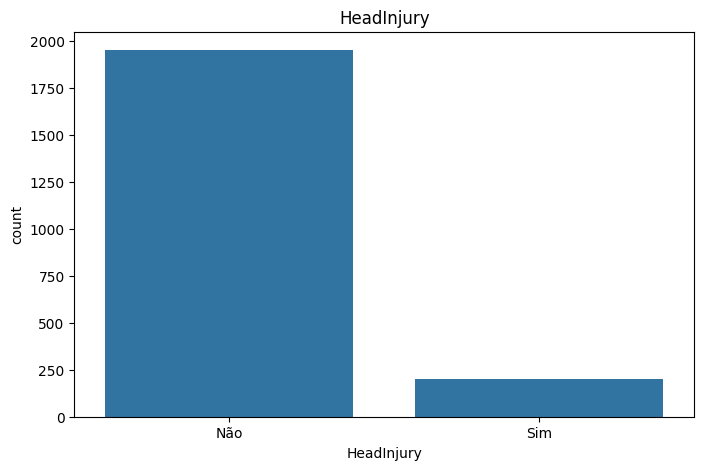

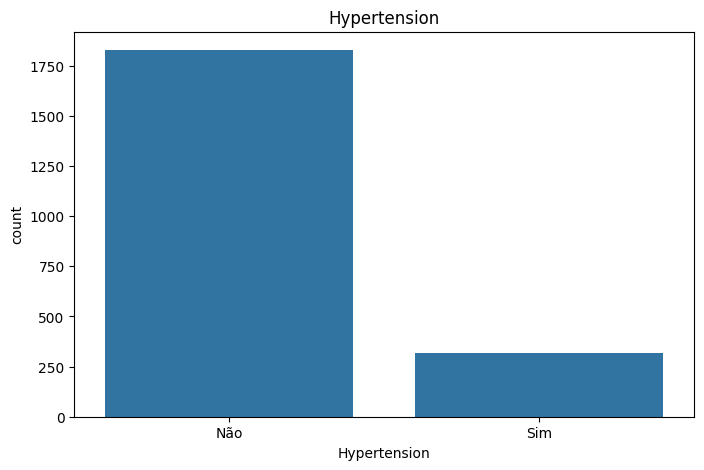

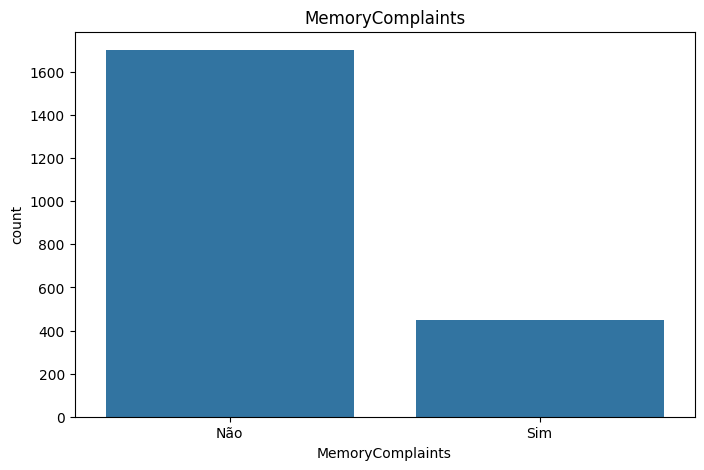

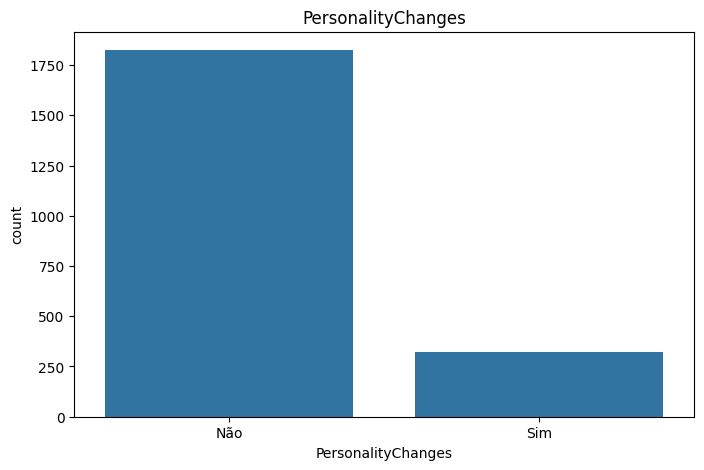

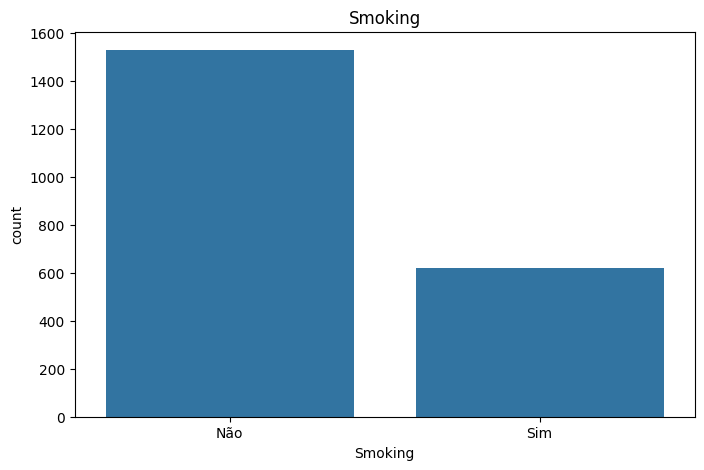

In [ ]:
for column in colunas_categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=alzheimer, x=column)
    plt.title(f'{column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

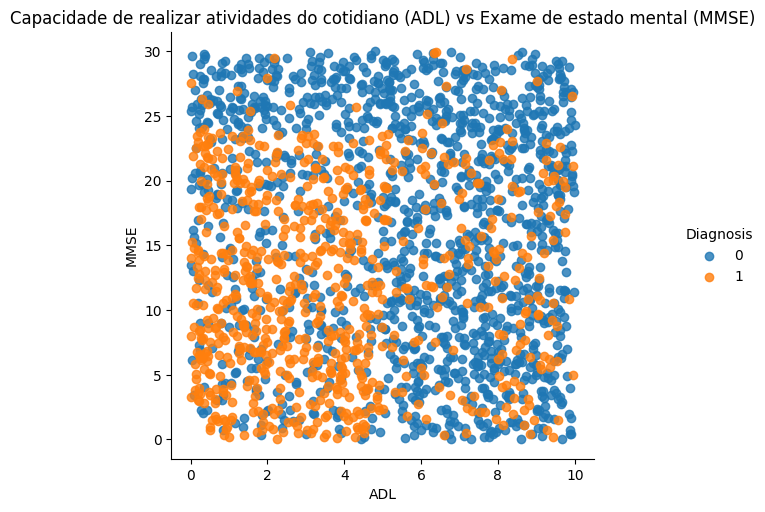

In [ ]:
# scatter plot
sns.lmplot(x='ADL', y='MMSE', data=alzheimer,
           fit_reg=False,
           hue='Diagnosis')

# cria um título para o gráfico
plt.title('Capacidade de realizar atividades do cotidiano (ADL) vs Exame de estado mental (MMSE)')

# mostra o gráfico
plt.show()


In [ ]:
alzheimer[['MMSE', 'Diagnosis']].groupby(['MMSE'], as_index=False).mean().sort_values(by='Diagnosis', ascending=False)

,MMSE,Diagnosis
1074,14.441660,1.0
1591,22.006861,1.0
844,11.153068,1.0
1674,23.164826,1.0
1673,23.158881,1.0
...,...,...
910,11.969212,0.0
908,11.967863,0.0
905,11.941889,0.0
904,11.924517,0.0


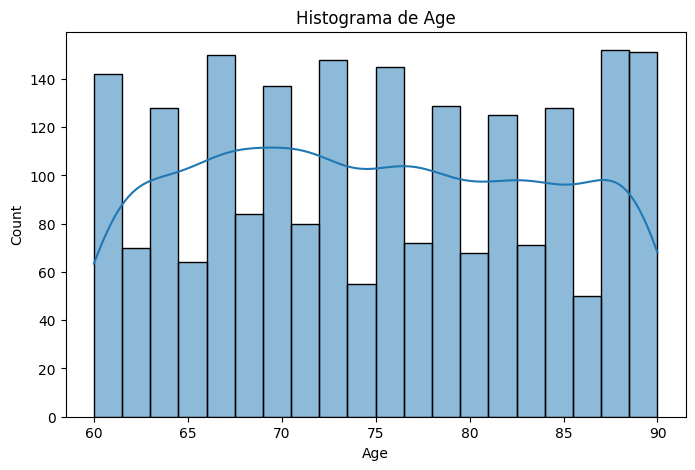

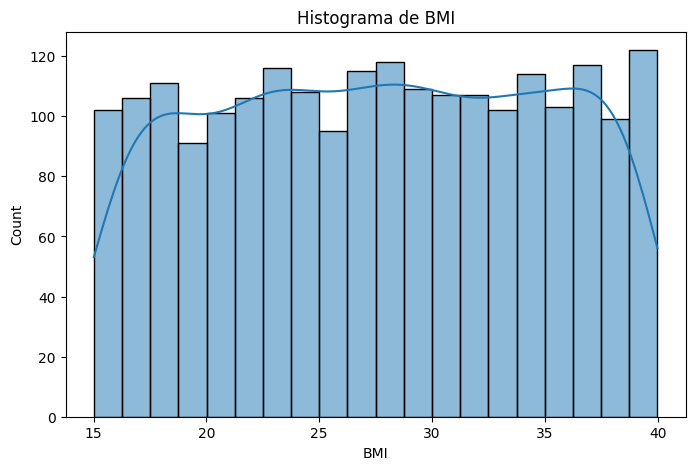

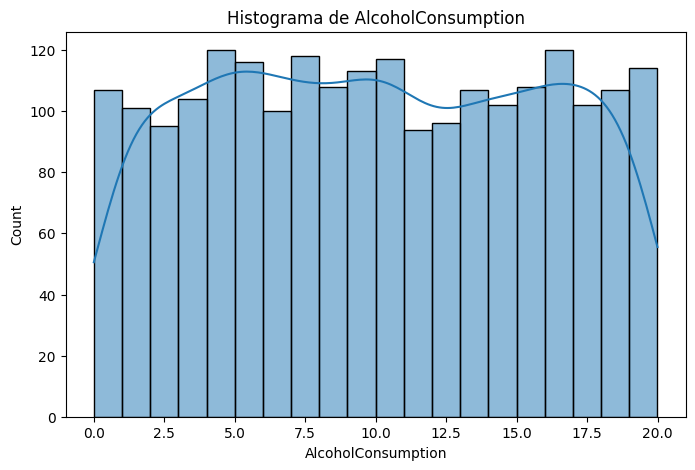

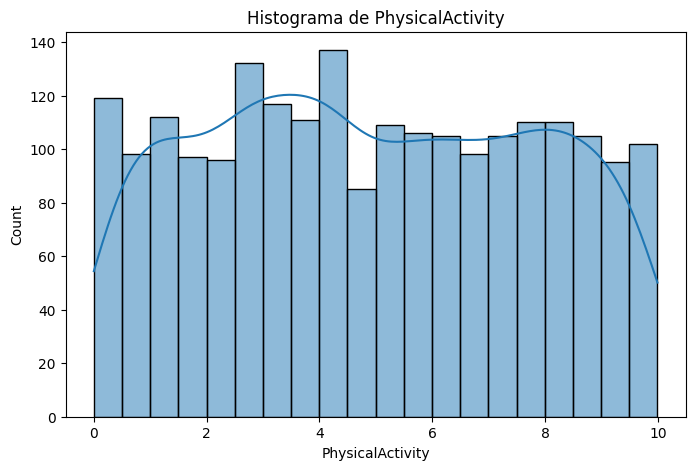

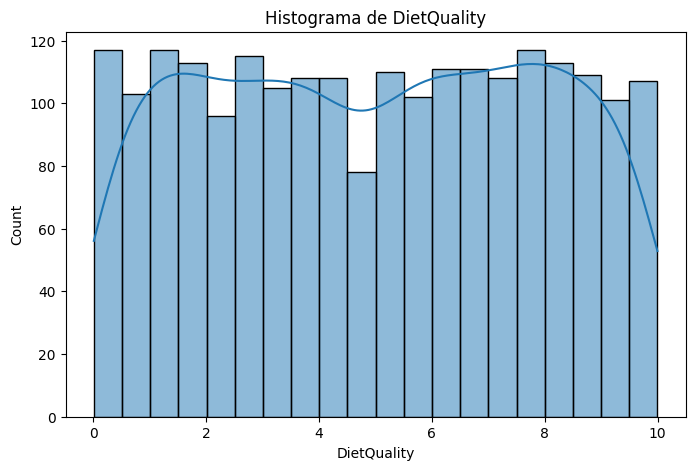

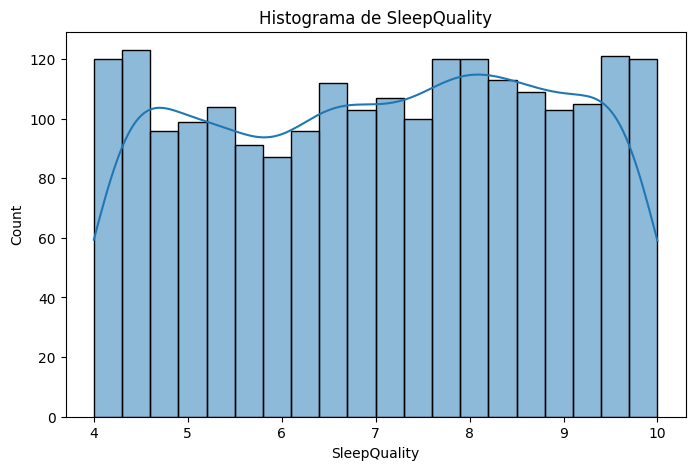

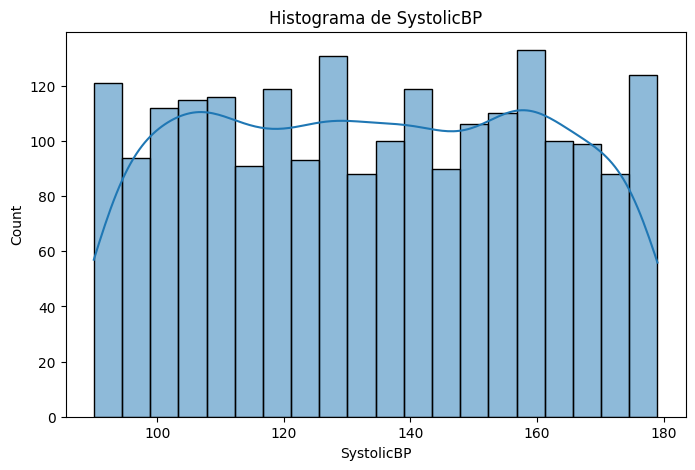

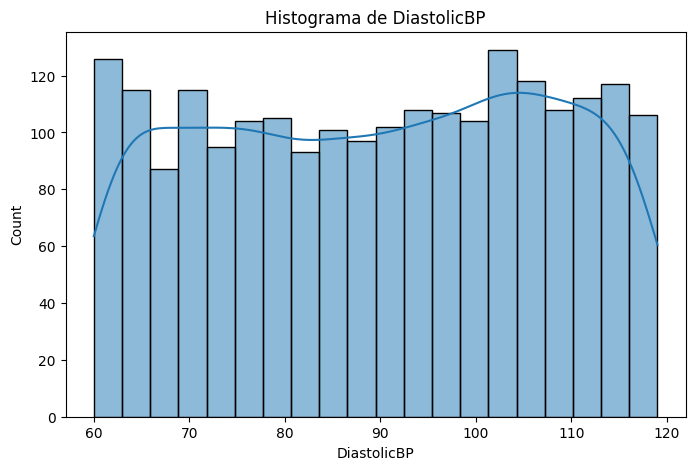

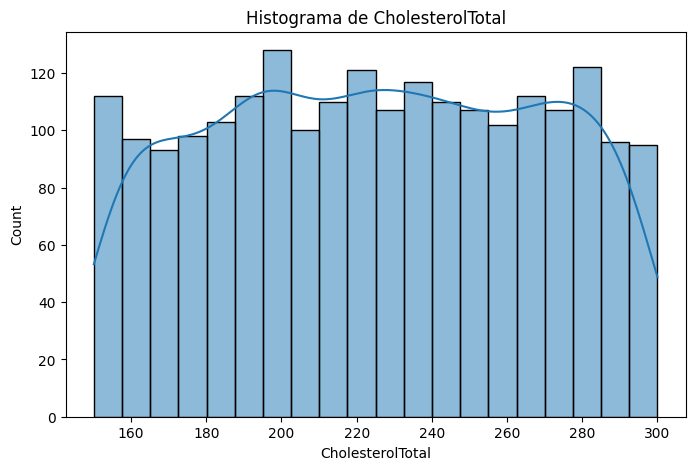

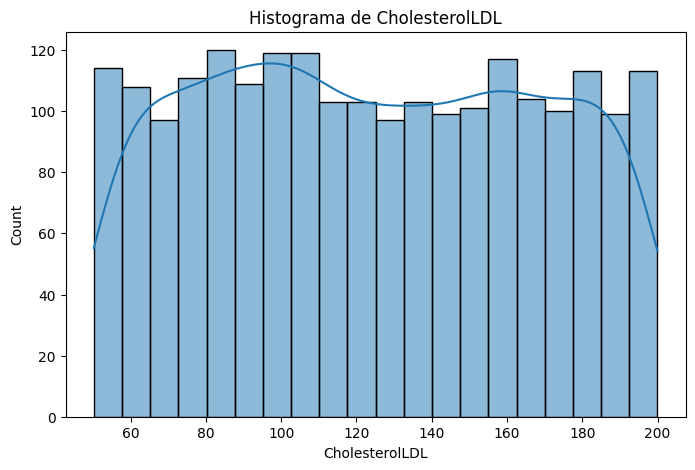

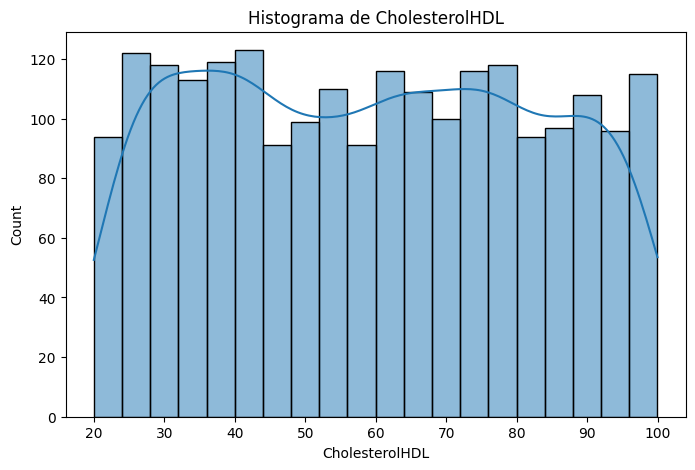

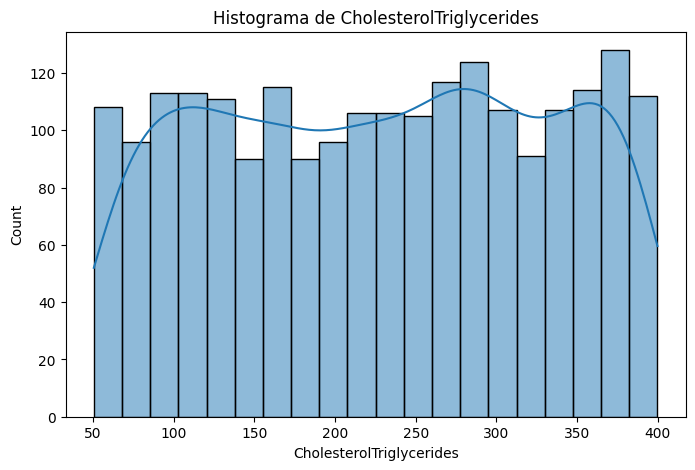

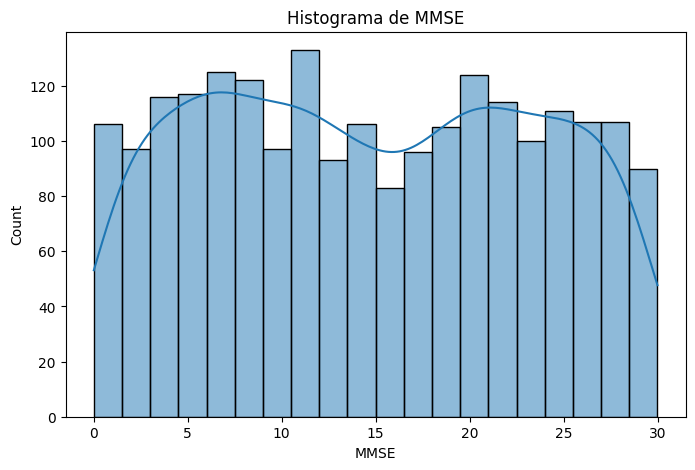

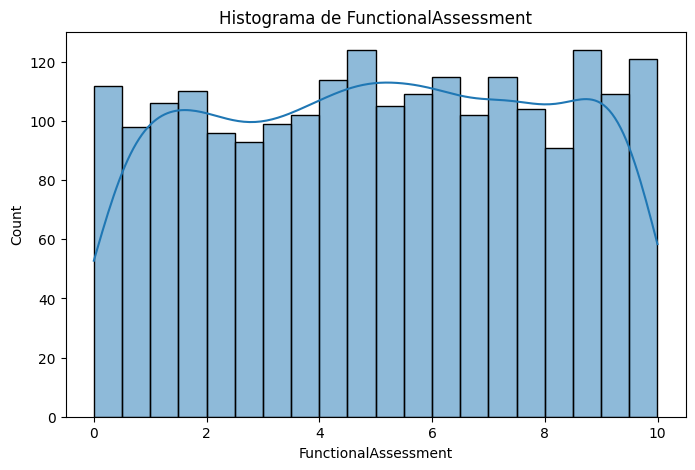

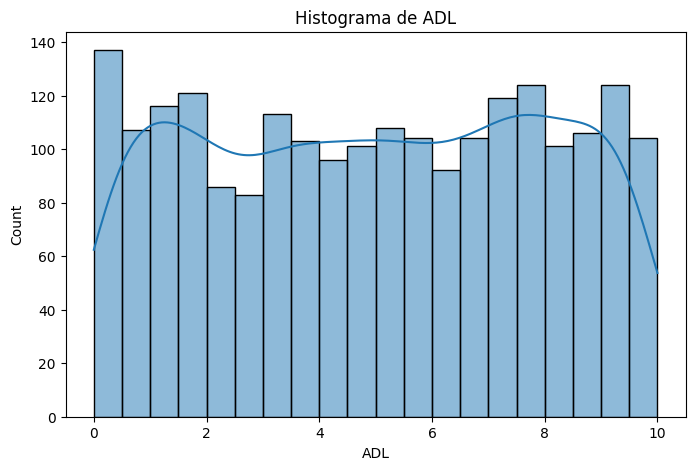

In [ ]:
# Histograma para cada coluna numérica
for column in colunas_numericas:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=alzheimer, x=column, kde=True, bins=20)
    plt.title(f'Histograma de {column}')
    plt.show()

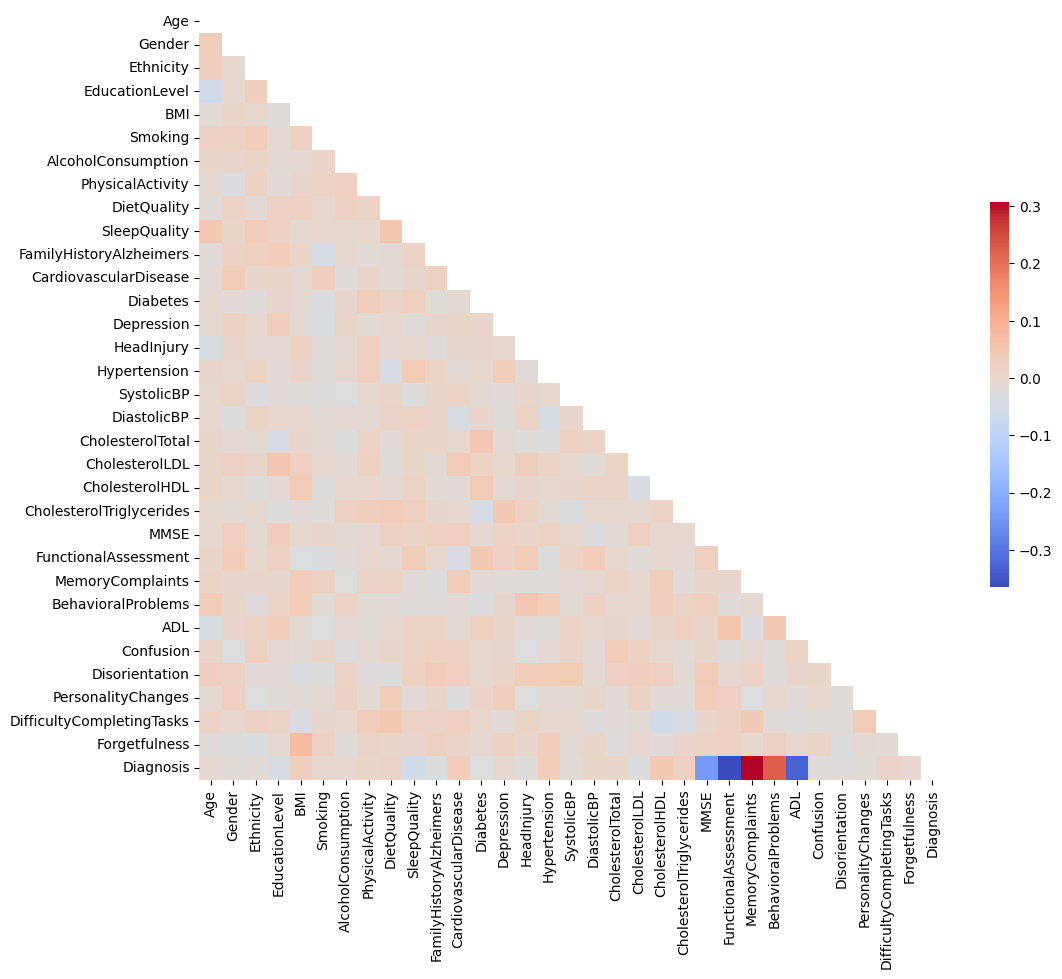

In [ ]:
# Explorando correlações
# Cria uma máscara para o triângulo superior
mask = np.triu(np.ones_like(alzheimer.corr(), dtype=bool))

# Plota um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(alzheimer.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

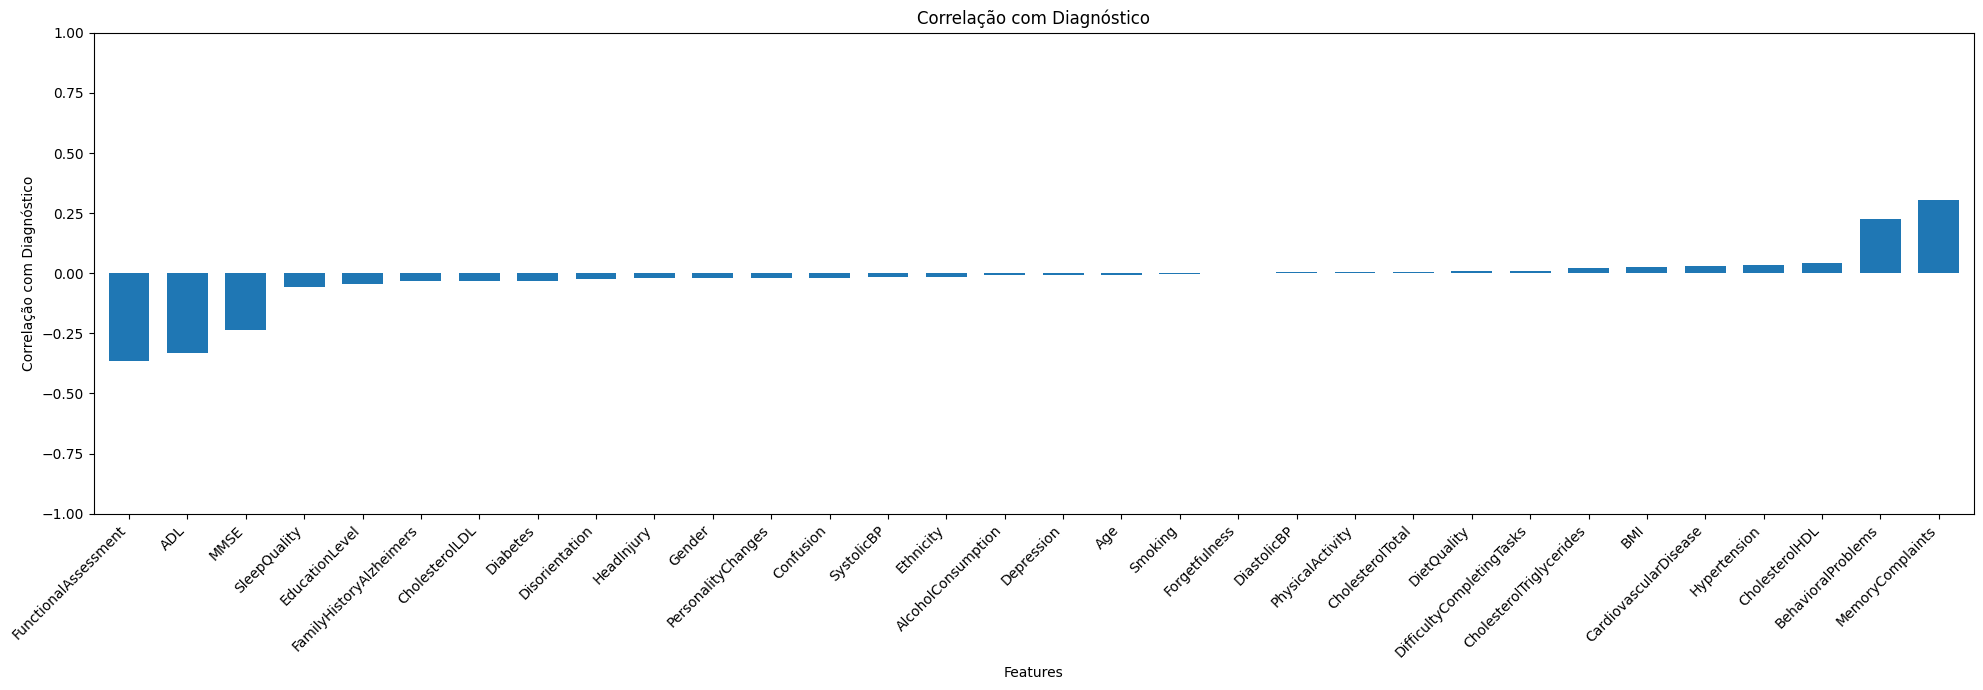

In [ ]:
correlations = alzheimer.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

plt.figure(figsize=(20, 7))

ax = correlations.plot(kind='bar', width=0.7)

ax.set(ylim=[-1, 1], ylabel='Correlação com Diagnóstico', xlabel='Features',
       title='Correlação com Diagnóstico')

ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

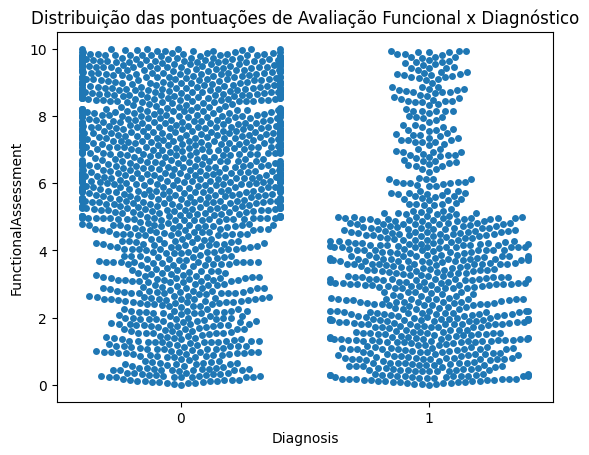

In [ ]:
sns.swarmplot(data=alzheimer, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribuição das pontuações de Avaliação Funcional x Diagnóstico')
plt.show()

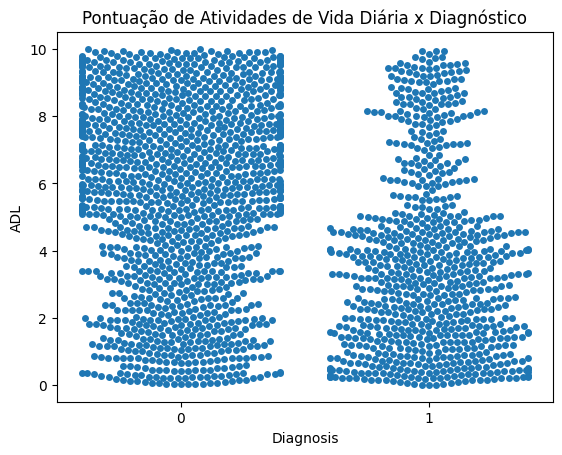

In [ ]:
sns.swarmplot(data=alzheimer, y='ADL', x='Diagnosis')
plt.title(f'Pontuação de Atividades de Vida Diária x Diagnóstico')
plt.show()

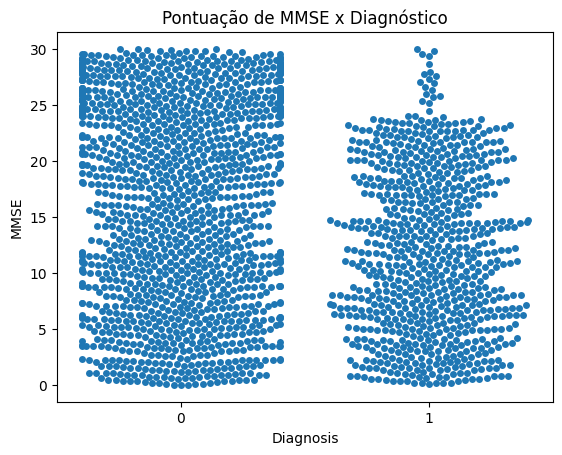

In [ ]:
sns.swarmplot(data=alzheimer, y='MMSE', x='Diagnosis')
plt.title(f'Pontuação de MMSE x Diagnóstico')
plt.show()

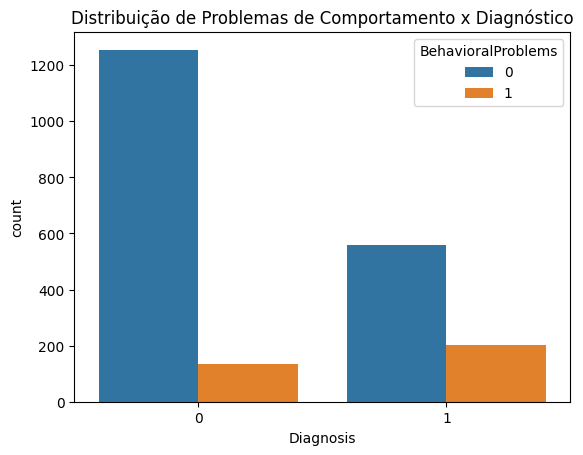

In [ ]:
sns.countplot(data=alzheimer, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribuição de Problemas de Comportamento x Diagnóstico')
plt.show()

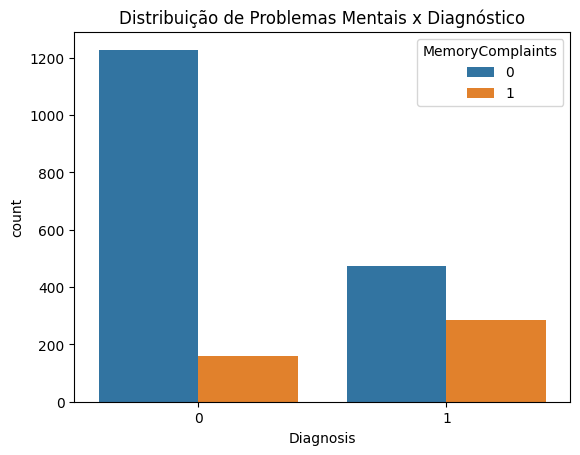

In [ ]:
sns.countplot(data=alzheimer, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribuição de Problemas Mentais x Diagnóstico')
plt.show()

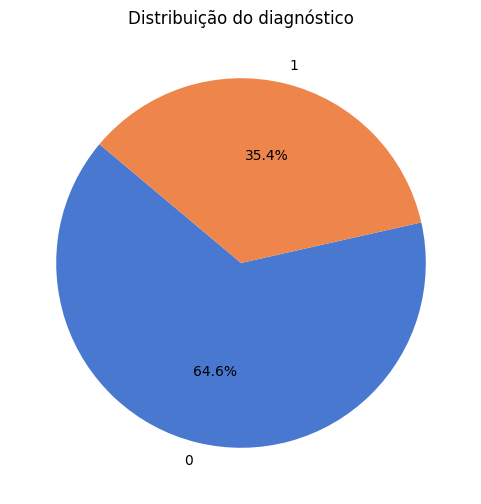

In [ ]:
categories = [0, 1]
counts = alzheimer.Diagnosis.value_counts().tolist()

colors = sns.color_palette("muted")

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribuição do diagnóstico')
plt.show()

# Resumo da Exploração Inicial dos Dados
* O dataset contém um total de 2.149 linhas.
* Todos os valores no dataset são não-nulos e numéricos.
* Não existem dados duplicados.
* A classe-alvo é moderadamente desequilibrada, com 65% das instâncias sendo 0 e 35% sendo 1.

# Pré-processamento

In [ ]:
alzheimer

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [ ]:
# Valores únicos em cada coluna
for column in alzheimer.columns:
    unique_values = alzheimer[column].unique()
    print(f"Valores únicos na coluna '{column}':")
    print(unique_values)
    print()

Valores únicos na coluna 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Valores únicos na coluna 'Gender':
[0 1]

Valores únicos na coluna 'Ethnicity':
[0 3 1 2]

Valores únicos na coluna 'EducationLevel':
[2 0 1 3]

Valores únicos na coluna 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Valores únicos na coluna 'Smoking':
[0 1]

Valores únicos na coluna 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Valores únicos na coluna 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Valores únicos na coluna 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Valores únicos na coluna 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Valores únicos na coluna 'FamilyHistoryAlzheimers':
[0 1]

Valores únicos na coluna 'Cardiovascular

In [ ]:
# Normalizando as colunas
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

min_max_scaler = MinMaxScaler()
alzheimer[columns] = min_max_scaler.fit_transform(alzheimer[columns])

standard_scaler = StandardScaler()
alzheimer[columns] = standard_scaler.fit_transform(alzheimer[columns])

alzheimer

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,0,0,0,-0.472753,0.634063,1.299701,-0.679609,0.063957,0.061185,-1.574000,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,0,0,0,0.683615,0.918342,-0.912555,-0.667149,1.477761,1.370158,-0.963527,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,0,0,0,-0.742572,1.600609,0.278072,0.736484,1.738352,0.652402,0.261971,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,0,0,0,-1.205119,0.349785,0.399688,-1.657260,0.943104,-0.814293,-1.245437,0.032446,0,0,-0.406078,0,0,0,0,1,1


# Modelagem

In [ ]:
from sklearn.metrics import f1_score

accuracies = []
train_accuracies = []
f1_scores = []
train_f1_scores = []

X = alzheimer.drop(columns=['Diagnosis'])
y = alzheimer['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'NaiveBayes': {},
    'Redes Neurais': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'learning_rate_init': [0.001, 0.01],
        'max_iter': [200, 300]
    }
}

models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Redes Neurais': MLPClassifier(random_state=42)
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred_test = best_model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    accuracies.append(acc_test)
    f1_scores.append(f1_test)

    y_pred_train = best_model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    train_accuracies.append(acc_train)
    train_f1_scores.append(f1_train)

    report = classification_report(y_test, y_pred_test)
    print(f'Relatório de Classificação de {name}:\n{report}')

    print(f"\nModelo: {name}")
    print(f"Acurácia no Treino: {acc_train:.4f}, Acurácia no Teste: {acc_test:.4f}")
    print(f"F1 Score no Treino: {f1_train:.4f}, F1 Score no Teste: {f1_test:.4f}\n")


Relatório de Classificação de KNN:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       277
           1       0.66      0.46      0.54       153

    accuracy                           0.72       430
   macro avg       0.70      0.67      0.67       430
weighted avg       0.71      0.72      0.71       430


Modelo: KNN
Acurácia no Treino: 0.8371, Acurácia no Teste: 0.7233
F1 Score no Treino: 0.8314, F1 Score no Teste: 0.7098

Relatório de Classificação de Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430


Modelo: Naive Bayes
Acurácia no Treino: 0.8202, Acurácia no Teste: 0.8326
F1 Score no Treino: 0.8189, F1 Score no Teste: 0.8309

Relatório de Cla

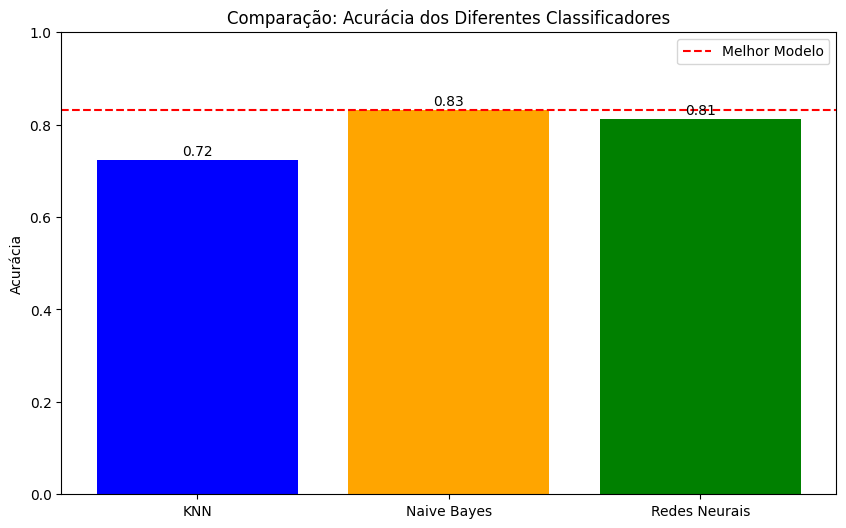

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação: Acurácia dos Diferentes Classificadores')
plt.axhline(y=max(accuracies), color='red', linestyle='--', label='Melhor Modelo')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.legend()
plt.show()
